In [2]:
import pandas as pd
import numpy as np
import seaborn as sn

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm, skew #for some statistics
from scipy import stats #qqplot
import statsmodels.api as sm #for decomposing the trends, seasonality etc.

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
arima=pd.read_csv(r"C:\Users\Bogere\OneDrive\Desktop\Research Project\NFLX.csv")
arima.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
arima = arima.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
arima

,Date,Adj Close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001
...,...,...
1004,2022-01-31,427.140015
1005,2022-02-01,457.130005
1006,2022-02-02,429.480011
1007,2022-02-03,405.600006


C:\Users\Bogere\AppData\Local\Temp\ipykernel_15732\3536871321.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(arima['Adj Close'], fit=norm)


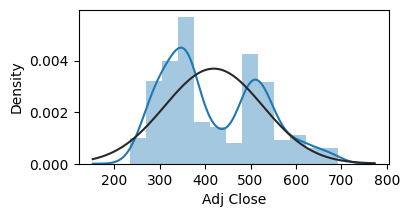

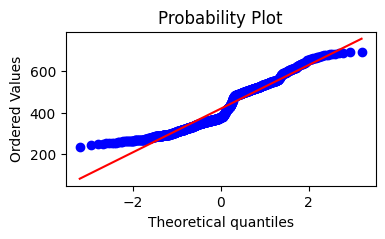

In [5]:
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 4,2

sn.distplot(arima['Adj Close'], fit=norm)

#Get the QQ-plot
fig = plt.figure()
res = stats.probplot(arima['Adj Close'], plot=plt)
plt.show()

In [5]:
arima = arima.groupby('Date')['Adj Close'].sum().reset_index()

In [6]:
arima.Date=pd.to_datetime(arima.Date)
arima

,Date,Adj Close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001
...,...,...
1004,2022-01-31,427.140015
1005,2022-02-01,457.130005
1006,2022-02-02,429.480011
1007,2022-02-03,405.600006


In [7]:
arima.set_index(['Date'],inplace=True)
arima.head()

,Adj Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001


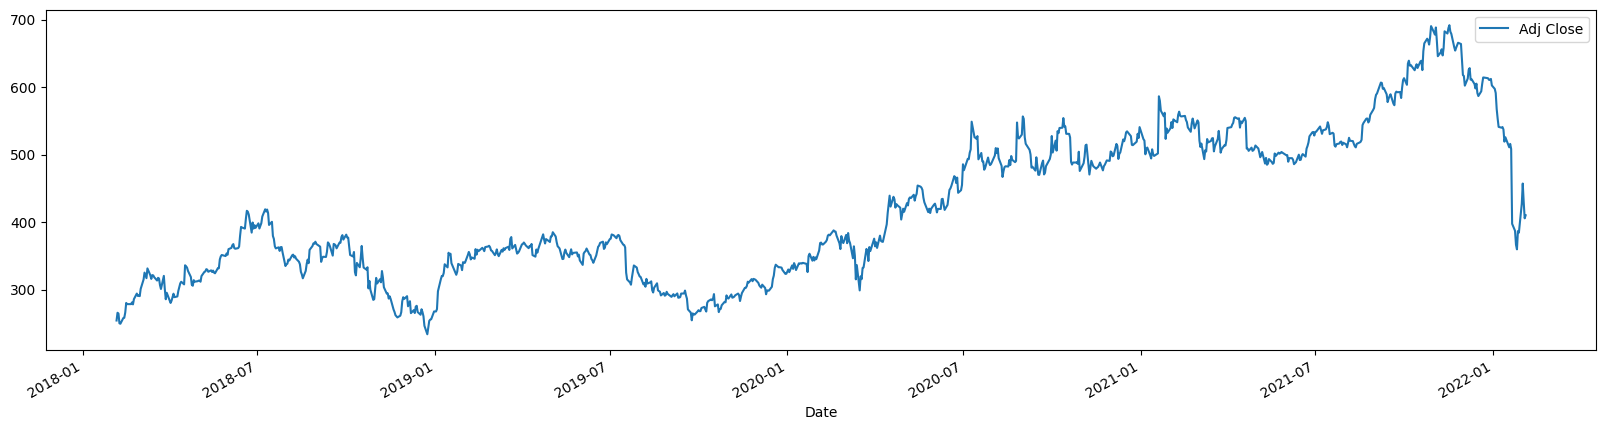

In [8]:
arima.plot(figsize=(20,5))
plt.show()

In [9]:
###Checking for stationarity using Augmented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller

def adfuller_test(trends):
    result = adfuller(trends)
    labels = ['ADF Test Statistic','p-value','#Lags Used','#Observation Used']
    for value,label in zip(result,labels):
        print(label  + ': ' + str(value))
    if result[1]<=0.05:
        print('Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary')
    else:
        print('week evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.')
        
adfuller_test(arima['Adj Close'])

ADF Test Statistic: -1.8125906878289957
p-value: 0.3742289256820758
#Lags Used: 6
#Observation Used: 1002
week evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.


ADF Test Statistic: -14.242275992929107
p-value: 1.5304022754298954e-26
#Lags Used: 5
#Observation Used: 1002
Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary


<Axes: xlabel='Date'>

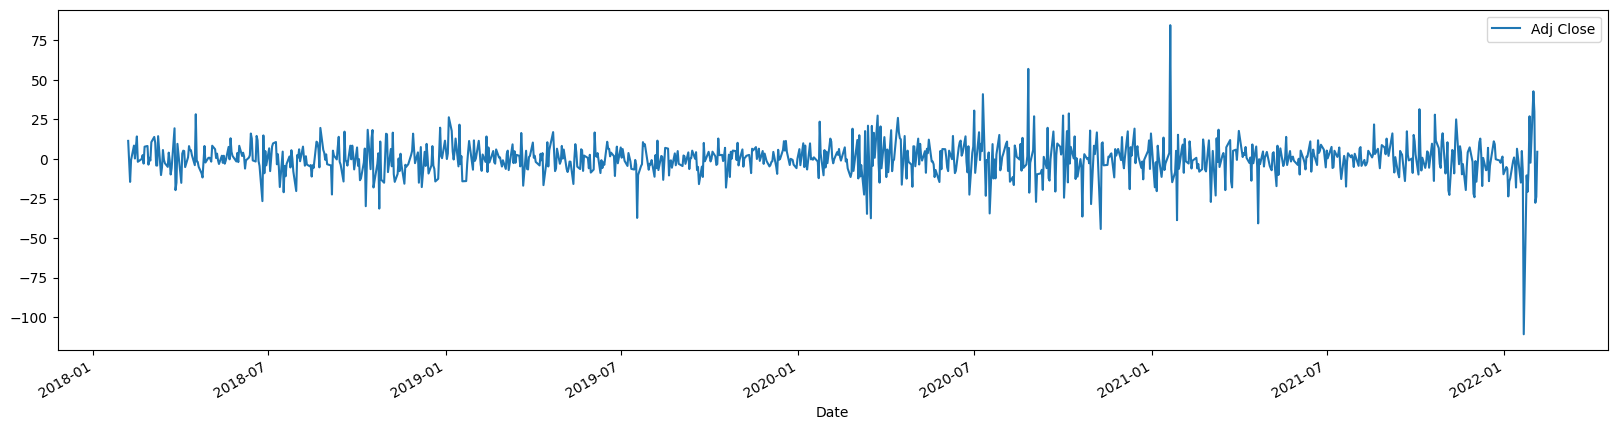

In [10]:
###Differencing the data to make it stationary
diff1=arima-arima.shift(1)
diff1=diff1.dropna()
adfuller_test(diff1)
diff1.plot(figsize=(20,5))

In [14]:
###Finding the most optimal values of p and q
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
for i in range(1,7):
    for j in range(1,7):
        model=ARIMA(arima['Adj Close'],order=(i,0,j))
        result=model.fit()
        print(f"AIC :{result.aic}, Order Of AR: {i}, Order of MA:{j} ")

AIC :7719.252725388626, Order Of AR: 1, Order of MA:1 
AIC :7720.890983923267, Order Of AR: 1, Order of MA:2 
AIC :7722.748629700624, Order Of AR: 1, Order of MA:3 
AIC :7723.685761892478, Order Of AR: 1, Order of MA:4 
AIC :7718.415482131926, Order Of AR: 1, Order of MA:5 
AIC :7718.172317924844, Order Of AR: 1, Order of MA:6 
AIC :7719.876850432056, Order Of AR: 2, Order of MA:1 
AIC :7723.251351789819, Order Of AR: 2, Order of MA:2 
AIC :7724.674017306024, Order Of AR: 2, Order of MA:3 
AIC :7723.762865569372, Order Of AR: 2, Order of MA:4 
AIC :7718.287566398045, Order Of AR: 2, Order of MA:5 
AIC :7720.069487586201, Order Of AR: 2, Order of MA:6 
AIC :7721.431345031125, Order Of AR: 3, Order of MA:1 
AIC :7714.6534769855025, Order Of AR: 3, Order of MA:2 
AIC :7725.176499994605, Order Of AR: 3, Order of MA:3 
AIC :7720.604316630749, Order Of AR: 3, Order of MA:4 
AIC :7719.97065833423, Order Of AR: 3, Order of MA:5 
AIC :7722.088940691729, Order Of AR: 3, Order of MA:6 
AIC :7723.

In [15]:
###Building ARIMA Model
model=ARIMA(arima['Adj Close'],order=(6,1,6))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 1009
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -3838.362
Date:                Mon, 10 Apr 2023   AIC                           7702.723
Time:                        23:30:10   BIC                           7766.628
Sample:                             0   HQIC                          7727.002
                               - 1009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2227      0.065      3.449      0.001       0.096       0.349
ar.L2          0.6266      0.062     10.139      0.000       0.505       0.748
ar.L3         -1.1329      0.069    -16.536      0.000      -1.267      -0.999
ar.L4          0.5392      0.062      8.669      0.000       0.417       0.661
ar.L5          0.2455      0.056      4.353      0.000       0.135       0.356
ar.L6         -0.8751      0.065    -13.547      0.000      -1.002      -0.748
ma.L1         -0.2626      0.074     -3.544      0.000      -0.408      -0.117
ma.L2         -0.5880      0.068     -8.675      0.000      -0.721      -0.455
ma.L3          1.1597      0.070     16.460      0.000       1.022       1.298
ma.L4         -0.5768      0.065     -8.892      0.000      -0.704      -0.450
ma.L5         -0.2655      0.065     -4.064      0.000      -0.394      -0.137
ma.L6          0.8399      0.073     11.538      0.000       0.697       0.983
sigma2       120.4546      2.383     50.552      0.000     115.784     125.125
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              9329.17
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

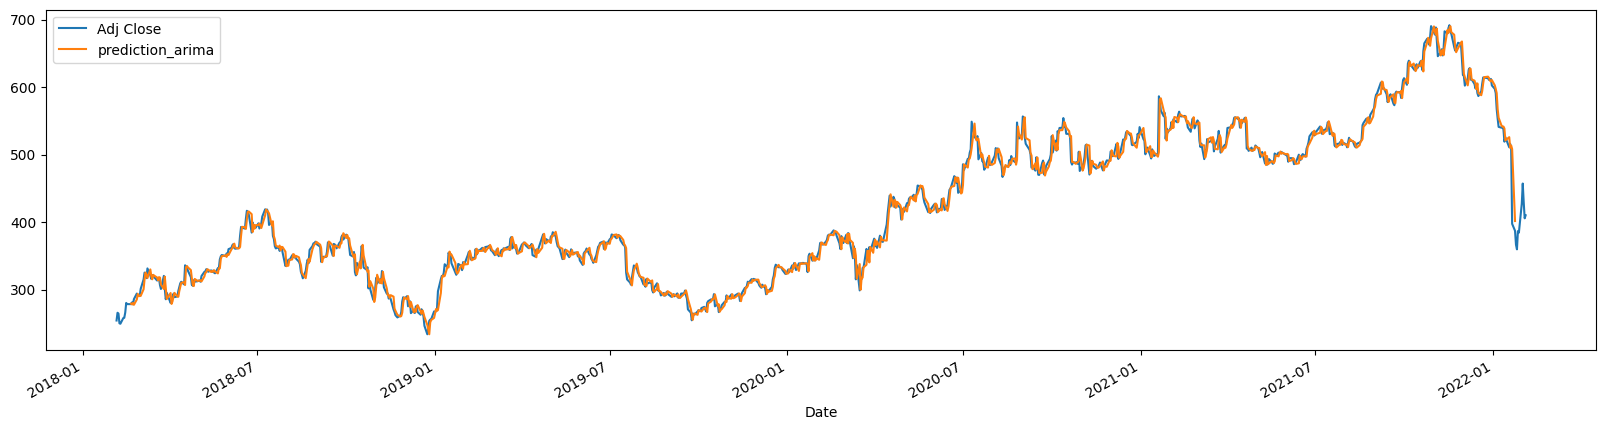

In [16]:
###Plotting the ARIMA prediction result
arima['prediction_arima']=result.predict(start=10,end=999)
arima[["Adj Close","prediction_arima"]].plot(figsize=(20,5))